#### **Advancing Skin Disease Detection: Precision Classification for Effective Diagnosis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Import Important libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [ ]:
!unzip /content/drive/MyDrive/B/Skin.zip

Streaming output truncated to the last 5000 lines.
  inflating: Skin/HAM10000_images_part_2/ISIC_0029326.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029327.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029328.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029329.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029330.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029331.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029332.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029333.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029334.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029335.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029336.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029337.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029338.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029339.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_0029340.jpg  
  inflating: Skin/HAM10000_images_part_2/ISIC_002

# Import datasets

# hmnist Dataset

The hmnist csv folders are all pixel descriptions and the L has fewer columns than the RGB folder

In [ ]:
hmnist_28_L=pd.read_csv('/content/Skin/hmnist_28_28_L.csv')
hmnist_28_L

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [ ]:
hmnist_28_RGB=pd.read_csv('/content/Skin/hmnist_28_28_RGB.csv')
hmnist_28_RGB

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


# Meta-data

In [ ]:
meta_data=pd.read_csv('/content/Skin/HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


There are 10 015 entries, and 7 columns.  

The age column has fewer entries than all the other columns

In [ ]:
# Check for unique entries in each column
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [ ]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

# Explaratory Data Analysis

In [ ]:
meta_data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


Most of the columns in the dataset are categorical, so finding statistical analysis of these columns is difficult

In [ ]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


Age is the only column with null entries

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


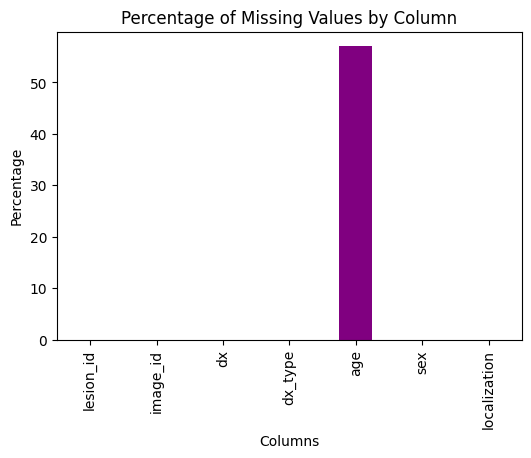

In [ ]:
# 2. Bar Plot of Missing Values
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [ ]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [ ]:
# Distribution of value count for Location of disease
for column in categorical_columns:
    meta_data['localization'].value_counts()

meta_data['localization'].value_counts()

,count
localization,
back,2192
lower extremity,2077
trunk,1404
upper extremity,1118
abdomen,1022
face,745
chest,407
foot,319
unknown,234


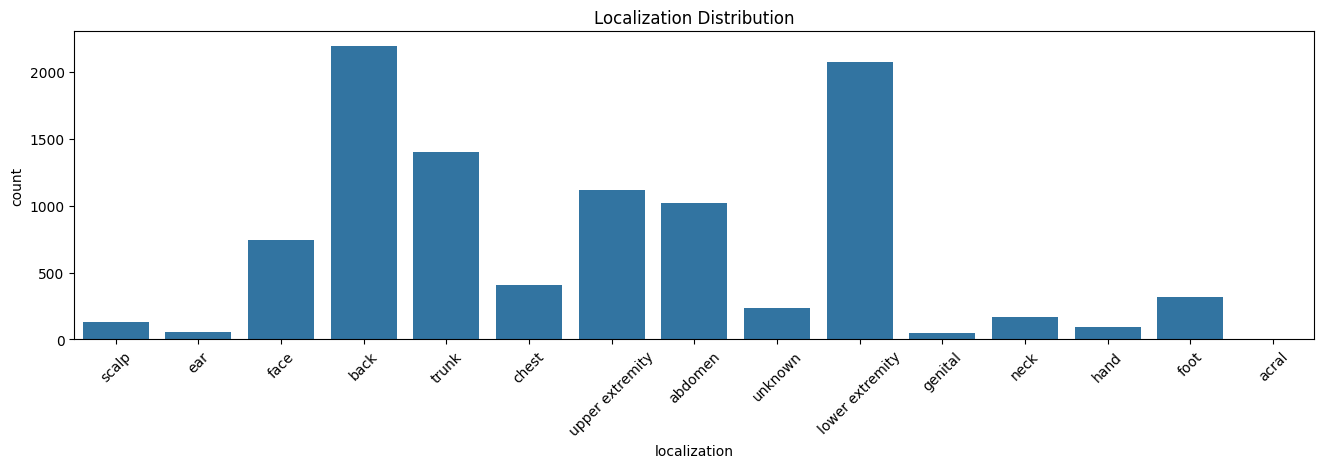

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

Majority of the skin conditions that exist in the dataset are located on the back

In [ ]:
# Distribution of value count for Sex in the dataset
for column in categorical_columns:
    meta_data['sex'].value_counts()

meta_data['sex'].value_counts()

,count
sex,
male,5406
female,4552
unknown,57


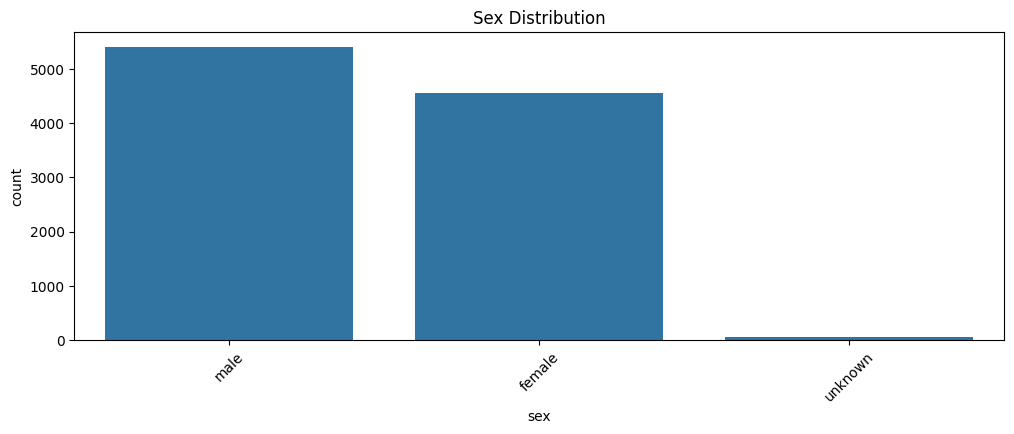

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

There are more males in the dataset, than females, and unknown gender

In [ ]:
# Distribution of value count for Type of disease
for column in categorical_columns:
    meta_data['dx'].value_counts()

meta_data['dx'].value_counts()

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


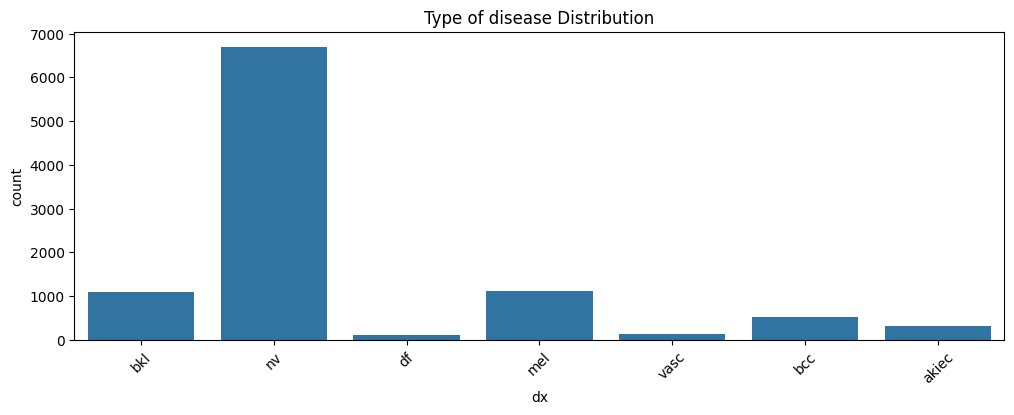

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

The skin condition that is more prevalent in the dataset is the melanocytic nevi

In [ ]:
# Distribution of value count for Confirmation method of disease
for column in categorical_columns:
    meta_data['dx_type'].value_counts()

meta_data['dx_type'].value_counts()

,count
dx_type,
histo,5340
follow_up,3704
consensus,902
confocal,69


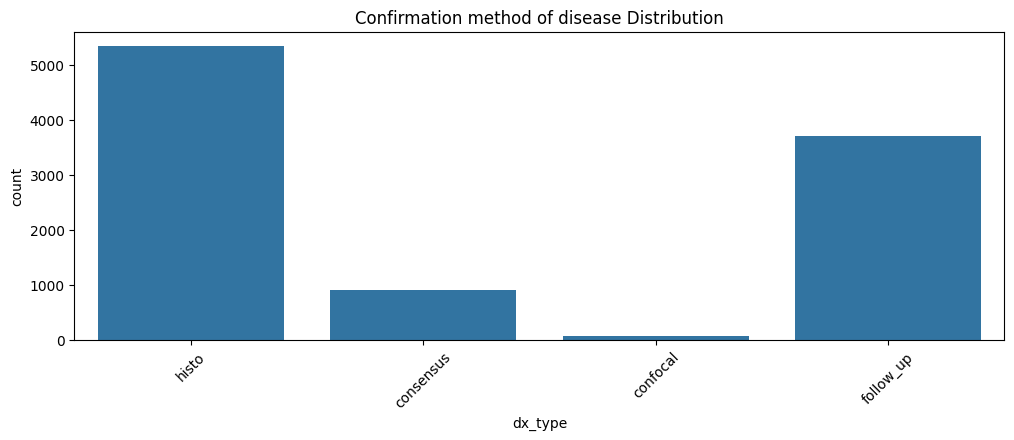

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

Most conditions are confirmed through histopathology (histo), secondandly through follow-up examination (follow_up), thirdly through expert consensus (consensus), and lastly through in-vivo confocal microscopy (confocal)

In [ ]:
# Distribution of numerical columns
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


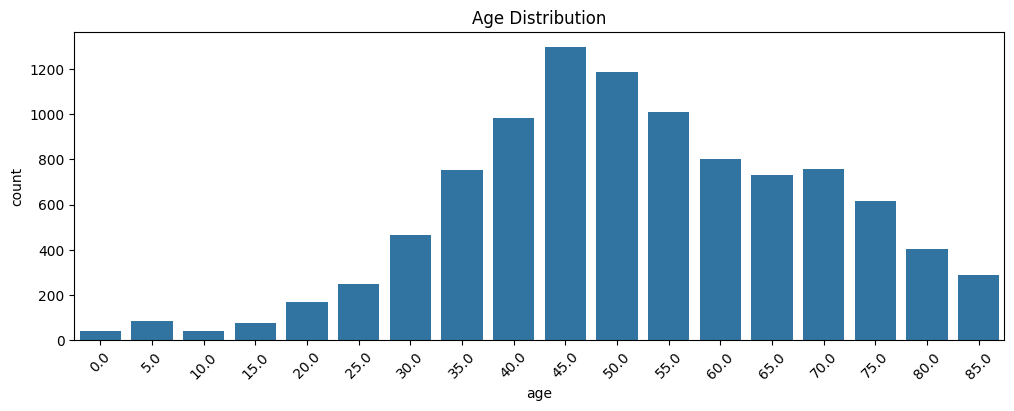

In [ ]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

The most prominent age in the dataset, is 45

# Explaratpry Data Analysis for Relationship among variables

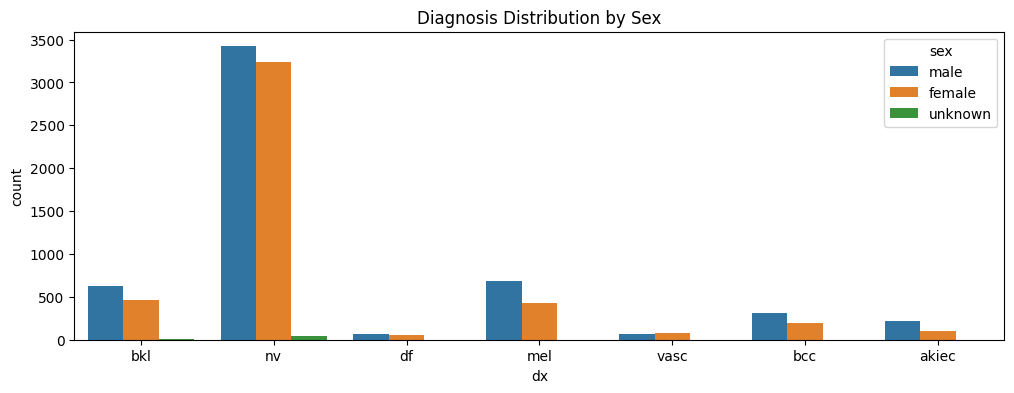

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

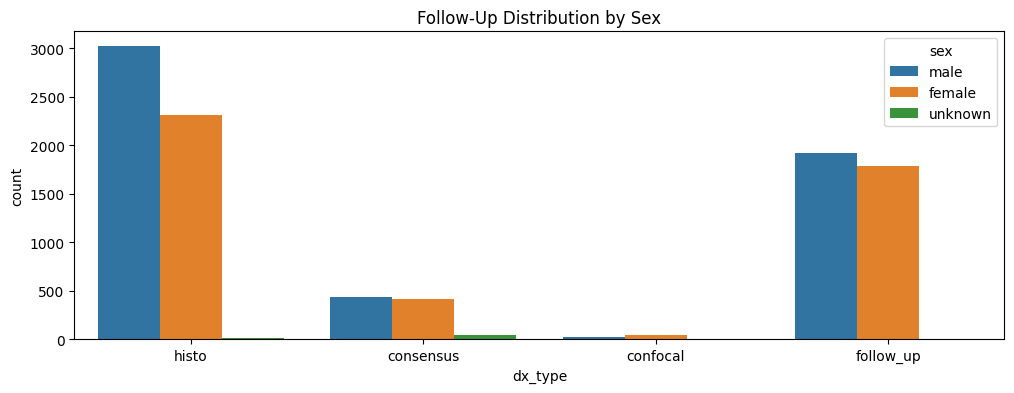

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

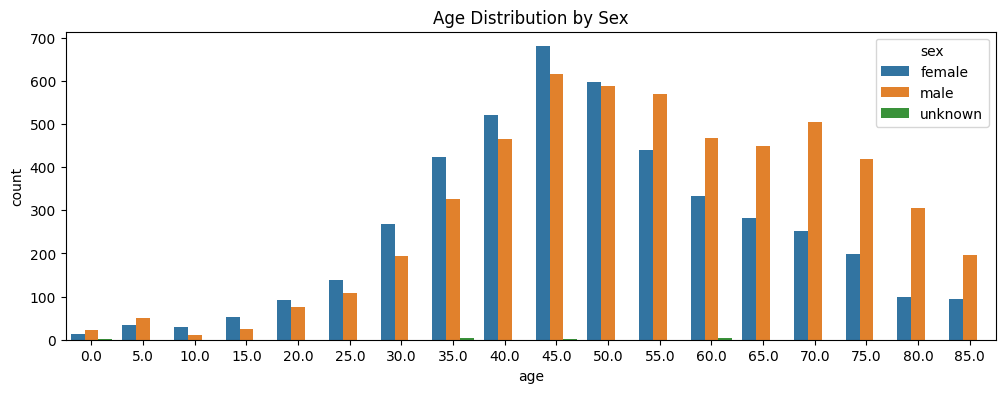

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

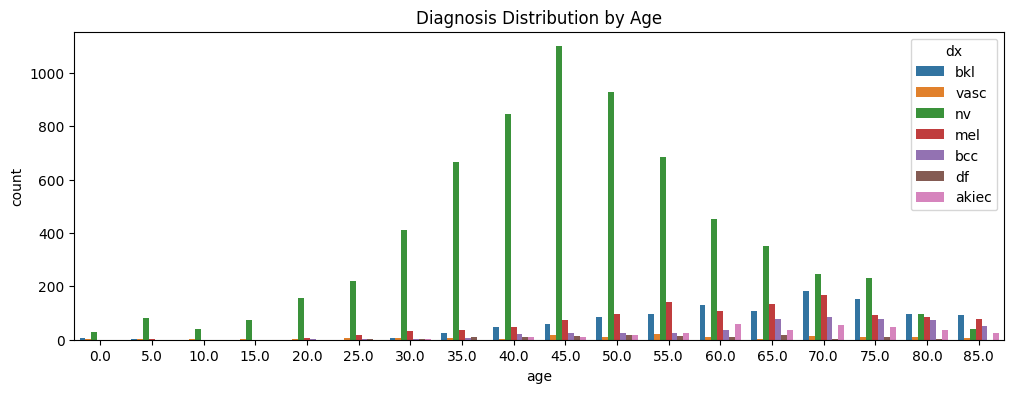

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

nv is the most dominant disease amongst all the ages

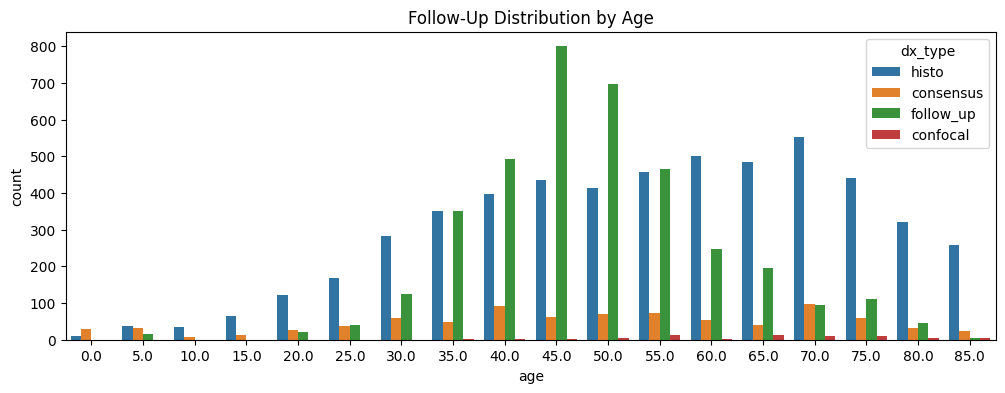

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

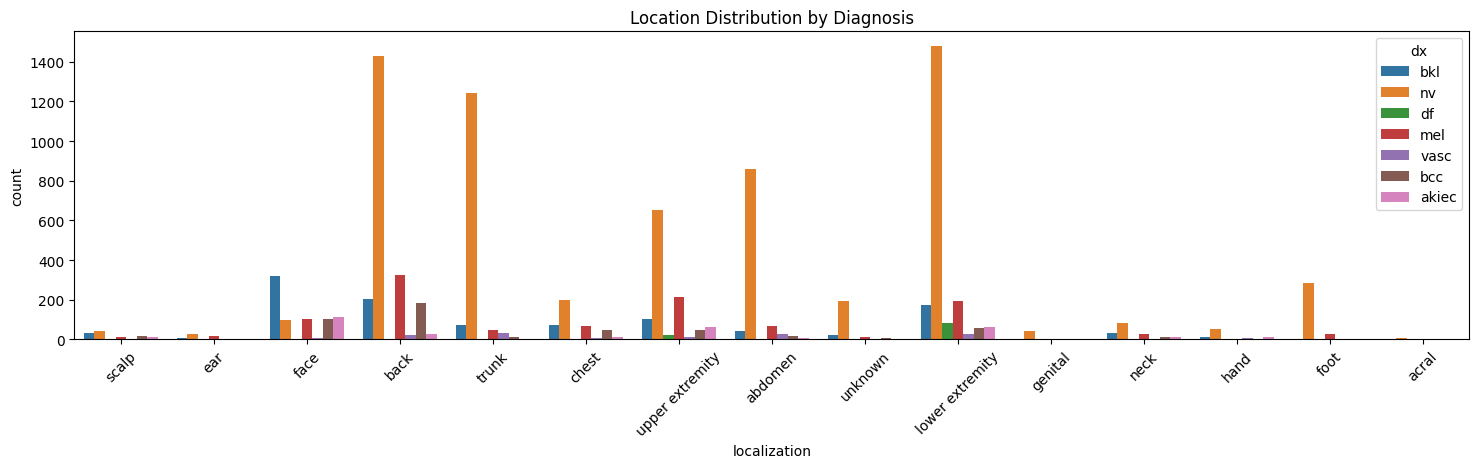

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

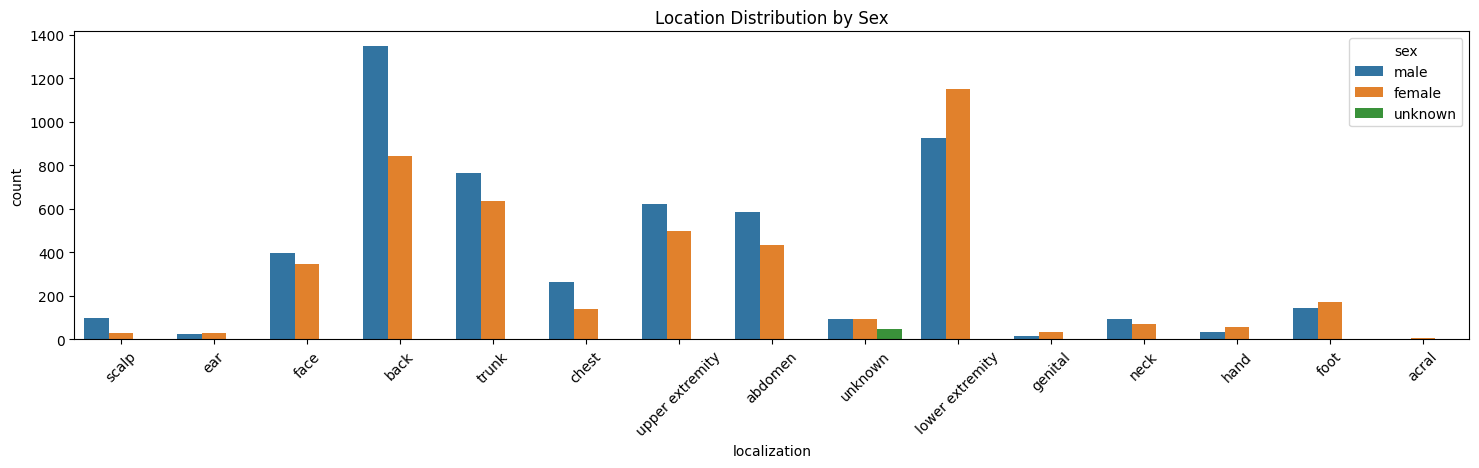

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

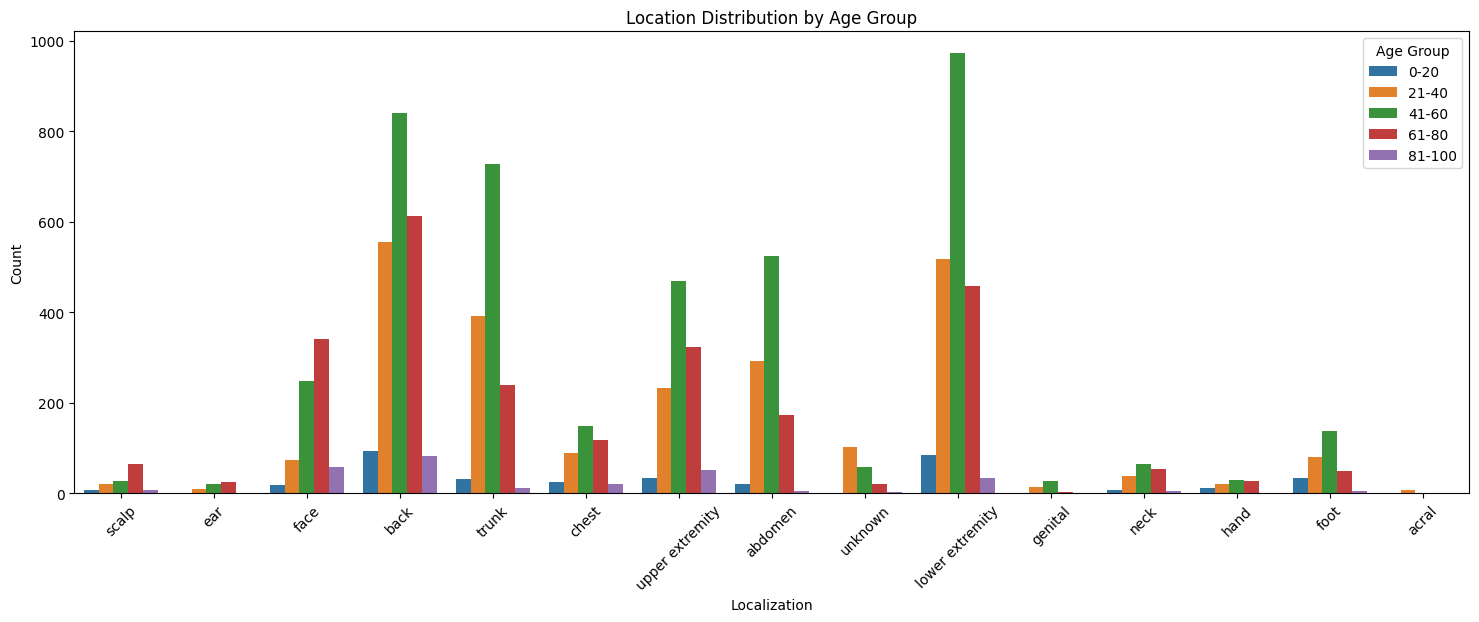

In [ ]:
# Assuming 'age' column contains numerical values, create age groups
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Add the age groups as a new column in the DataFrame
meta_data['age_group'] = age_groups

# Visualizing relationships between categorical columns and age groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

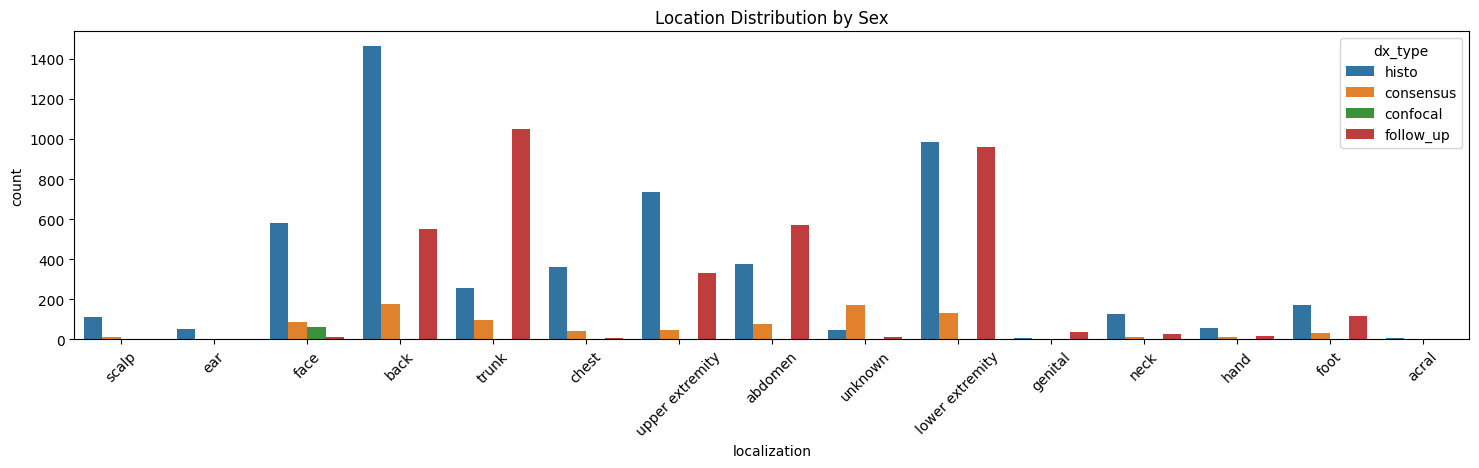

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

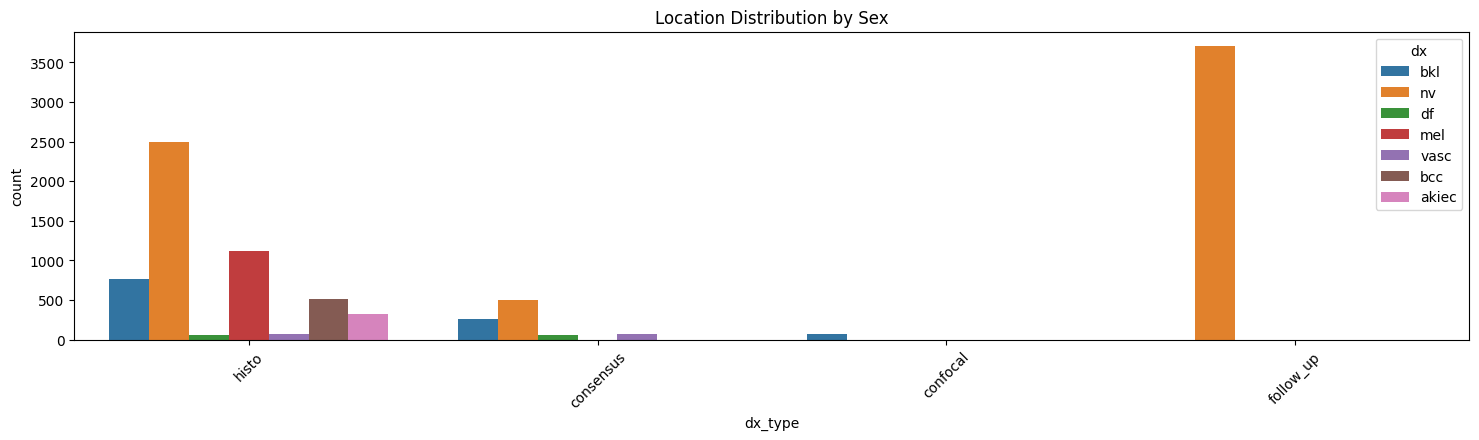

In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

Step 1: Data cleansing involves identifying and correcting errors or inconsistencies in the data.

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lesion_id     10015 non-null  object  
 1   image_id      10015 non-null  object  
 2   dx            10015 non-null  object  
 3   dx_type       10015 non-null  object  
 4   age           9958 non-null   float64 
 5   sex           10015 non-null  object  
 6   localization  10015 non-null  object  
 7   age_group     9919 non-null   category
dtypes: category(1), float64(1), object(6)
memory usage: 557.8+ KB


In [ ]:
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,age_group
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,61-80
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,61-80
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,61-80
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,61-80
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,61-80


In [ ]:
# Removing duplicate rows
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

In [ ]:
#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Fixing column names

In [ ]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
# Define the mapping of current values to new values
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [ ]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign Keratosis-Like Lesions


In [ ]:
# Convert the Age column to integers

meta_data['Age'] = meta_data['Age'].astype(int)

In [ ]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions


# PreProcessing Complete

In [ ]:
#Path to the images
image_path1='/content/Skin/HAM10000_images_part_1'
image_path2='/content/Skin/HAM10000_images_part_2'

In [ ]:
#Directory for final combined images
final_image_dataset = '/content/Skin'

In [ ]:
import os
import shutil
# Create the destination folder if it doesn't exist
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

# Iterate through files in folder 1 and copy them to the destination folder
for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

# Iterate through files in folder 2 and copy them to the destination folder
for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [ ]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [ ]:
meta_data

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/Skin/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/Skin/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40,male,abdomen,Actinic Keratoses,/content/Skin/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80,male,face,Actinic Keratoses,/content/Skin/ISIC_0032854.jpg


# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'Region_Of_Disease' column
meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Updated_Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Updated_Diagnosis        10015 non-null  object
 8   Image_path               10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


In [ ]:
meta_data.head()

,Lesion_Id,Image_Id,Diagnosis,Confirmation_Method,Age,Sex,Region_Of_Disease,Updated_Diagnosis,Image_path,Updated_Diagnosis_Label
0,HAM_0000118,ISIC_0027419,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0027419.jpg,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0025030.jpg,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0026769.jpg,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80,male,scalp,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0025661.jpg,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75,male,ear,Benign Keratosis-Like Lesions,/content/Skin/ISIC_0031633.jpg,2


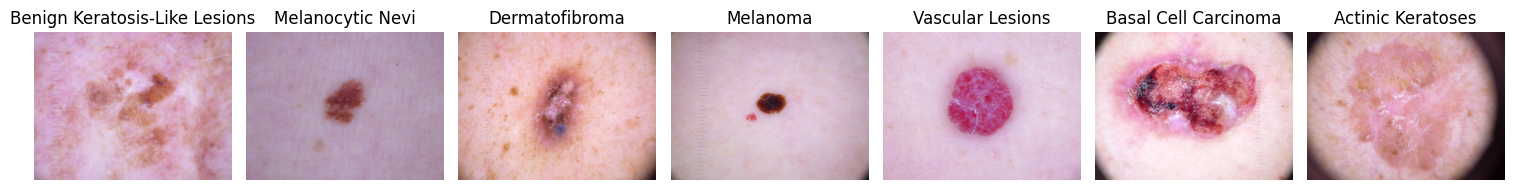

In [ ]:
# Ensure that the image paths are correct and accessible
for i in range(len(meta_data)):
    if not os.path.isfile(meta_data['Image_path'].iloc[i]):
        raise FileNotFoundError(f"Image file not found: {meta_data['Image_path'].iloc[i]}")

# Get one image per class
class_images = meta_data.drop_duplicates(subset='Updated_Diagnosis')

# Plot one image per class
def plot_class_images(class_images):
    plt.figure(figsize=(15, 5))
    num_classes = len(class_images)
    for i in range(num_classes):
        plt.subplot(1, num_classes, i + 1)
        img = plt.imread(class_images['Image_path'].iloc[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_images['Updated_Diagnosis'].iloc[i], fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the function to plot images
plot_class_images(class_images)

# Split

In [ ]:
# Separate features (X) and target variable (y)
X = meta_data.drop(columns=['Updated_Diagnosis_Label'])
y = meta_data['Updated_Diagnosis_Label']

# Display the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (10015, 9)
Shape of target variable (y): (10015,)


In [ ]:
# Perform initial train-test split without stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 6409 validated image filenames belonging to 7 classes.
Found 1603 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.


# **InceptionResNetV2**

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from keras.applications import ResNet152V2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# Load ResNet50 pre-trained on ImageNet without the top layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Calculate class weights
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 1.493661446681581, 1: 8.998203054806828, 2: 9.112829845313922, 3: 19.48443579766537, 4: 30.62691131498471, 5: 70.52816901408451, 6: 87.08695652173913}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# Training the model
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.6282 - loss: 1.2332 - val_accuracy: 0.6631 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 180s 865ms/step - accuracy: 0.6839 - loss: 0.9411 - val_accuracy: 0.6663 - val_loss: 0.8614 - learning_rate: 0.0010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 173s 828ms/step - accuracy: 0.6799 - loss: 0.9320 - val_accuracy: 0.6675 - val_loss: 0.8568 - learning_rate: 0.0010
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 203s 832ms/step - accuracy: 0.6814 - loss: 0.9093 - val_accuracy: 0.6825 - val_loss: 0.7951 - learning_rate: 0.0010
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 208s 869ms/step - accuracy: 0.6774 - loss: 0.9137 - val_accuracy: 0.6700 - val_loss: 0.8313 - learning_rate: 0.0010
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 173s 843ms/step - accuracy: 0.6886 - loss: 0.8733 - val_accuracy: 0.6974 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 199s 821ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 773ms/step
Accuracy: 0.69
Sensitivity: 1.00
Specificity: 0.00
Precision: 0.31
F1-Score: 0.20
AUC: 0.89


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 261ms/step


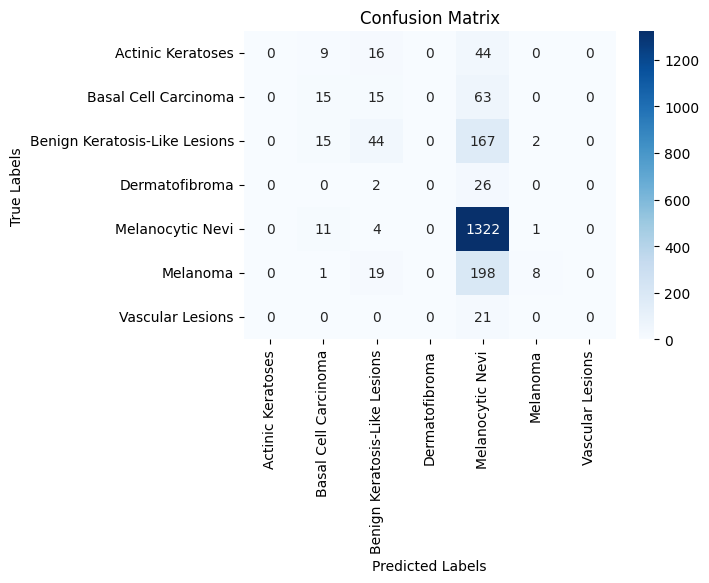

Classification Report:

                               precision    recall  f1-score   support

            Actinic Keratoses       0.00      0.00      0.00        69
         Basal Cell Carcinoma       0.29      0.16      0.21        93
Benign Keratosis-Like Lesions       0.44      0.19      0.27       228
               Dermatofibroma       0.00      0.00      0.00        28
             Melanocytic Nevi       0.72      0.99      0.83      1338
                     Melanoma       0.73      0.04      0.07       226
             Vascular Lesions       0.00      0.00      0.00        21

                     accuracy                           0.69      2003
                    macro avg       0.31      0.20      0.20      2003
                 weighted avg       0.63      0.69      0.60      2003



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 260ms/step


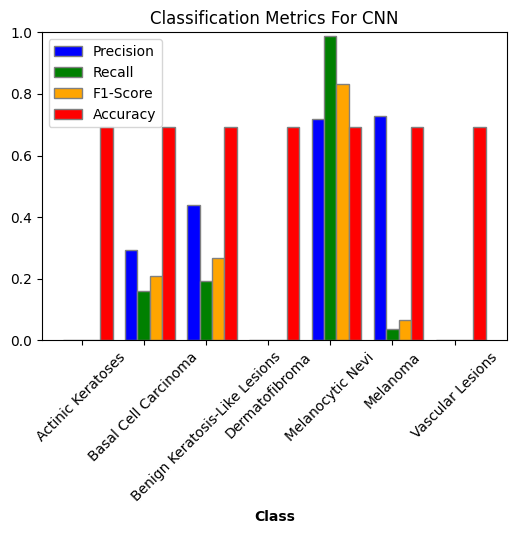

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

# The predictions will be in a one-hot encoded format, so convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Getting the true labels from the generator
true_classes = test_generator.classes
# Getting the class labels from the generator for later use in the classification report
class_labels = list(test_generator.class_indices.keys())

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

# Calculate accuracy for each class
accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

# Plotting
plt.figure(figsize=(6, 4))

# Width of each bar
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='orange', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='red', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

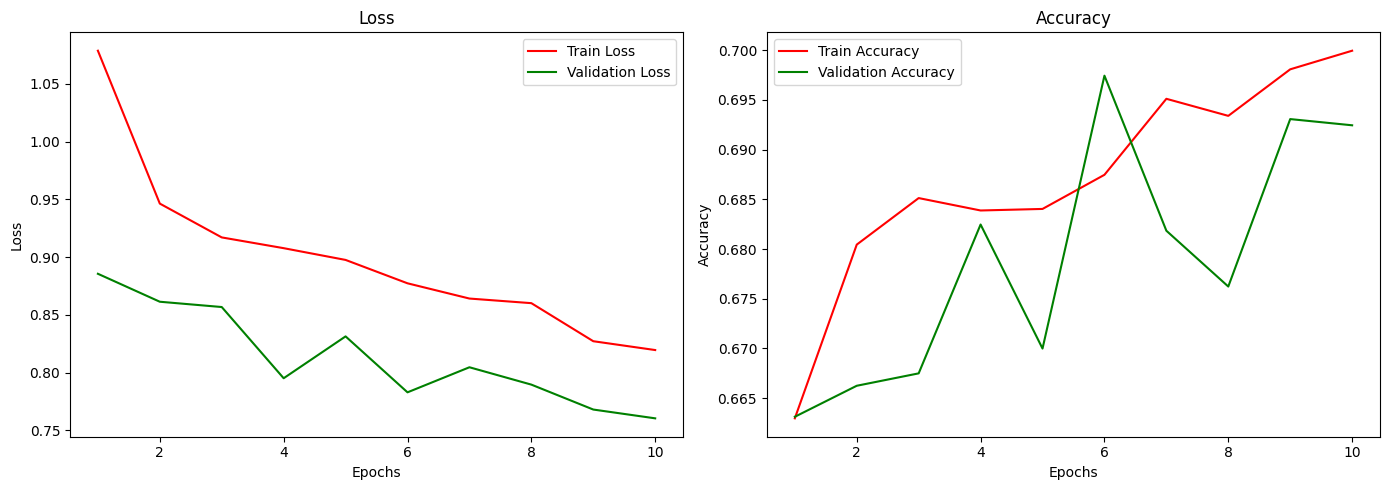

In [ ]:
# Plot training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming meta_data is your DataFrame and it includes 'Image_path'
# Let's print the first few rows to understand its structure
print(meta_data.head())

# Ensure you have the true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Verify lengths of true_labels, predicted_labels, and meta_data
print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted_labels: {len(predicted_labels)}")
print(f"Length of meta_data: {len(meta_data)}")

# Ensure the DataFrame's length matches the length of true_labels and predicted_labels
if len(true_labels) > len(meta_data):
    raise ValueError("The number of true labels exceeds the number of rows in the meta_data DataFrame.")

# Slice meta_data to match the number of true_labels/predicted_labels if needed
meta_data = meta_data.iloc[:len(true_labels)]

# Add true and predicted labels to the DataFrame
meta_data['true_label'] = [class_labels[true_labels[i]] for i in range(len(true_labels))]
meta_data['predicted_label'] = [class_labels[predicted_labels[i]] for i in range(len(predicted_labels))]

# Plotting test images with labels and predictions
plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

base_model =DenseNet201(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Calculate class weights
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 1.493661446681581, 1: 8.998203054806828, 2: 9.112829845313922, 3: 19.48443579766537, 4: 30.62691131498471, 5: 70.52816901408451, 6: 87.08695652173913}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# Training the model
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.6447 - loss: 2.1293 - val_accuracy: 0.7118 - val_loss: 1.0432 - learning_rate: 0.0010
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 181s 828ms/step - accuracy: 0.6943 - loss: 1.0629 - val_accuracy: 0.7093 - val_loss: 0.9197 - learning_rate: 0.0010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 172s 839ms/step - accuracy: 0.7058 - loss: 0.9516 - val_accuracy: 0.7280 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 210s 875ms/step - accuracy: 0.7053 - loss: 0.9248 - val_accuracy: 0.7268 - val_loss: 0.8426 - learning_rate: 0.0010
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 174s 845ms/step - accuracy: 0.7224 - loss: 0.8861 - val_accuracy: 0.7436 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 174s 838ms/step - accuracy: 0.7210 - loss: 0.8824 - val_accuracy: 0.7417 - val_loss: 0.8465 - learning_rate: 0.0010
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 198s 815ms/step - accuracy:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 60s 686ms/step
Accuracy: 0.74
Sensitivity: 0.95
Specificity: 0.50
Precision: 0.46
F1-Score: 0.40
AUC: 0.90


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 273ms/step


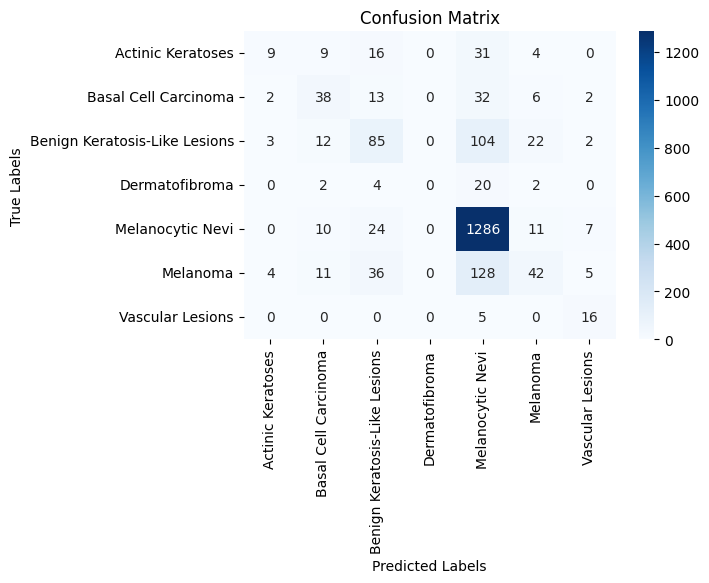

Classification Report:

                               precision    recall  f1-score   support

            Actinic Keratoses       0.50      0.13      0.21        69
         Basal Cell Carcinoma       0.46      0.41      0.43        93
Benign Keratosis-Like Lesions       0.48      0.37      0.42       228
               Dermatofibroma       0.00      0.00      0.00        28
             Melanocytic Nevi       0.80      0.96      0.87      1338
                     Melanoma       0.48      0.19      0.27       226
             Vascular Lesions       0.50      0.76      0.60        21

                     accuracy                           0.74      2003
                    macro avg       0.46      0.40      0.40      2003
                 weighted avg       0.69      0.74      0.70      2003



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 275ms/step


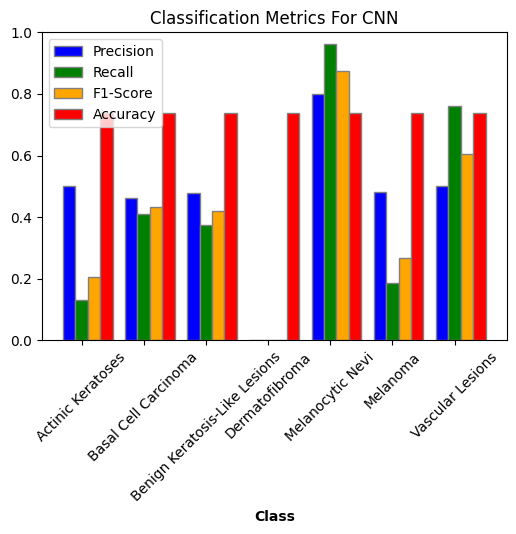

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

# The predictions will be in a one-hot encoded format, so convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Getting the true labels from the generator
true_classes = test_generator.classes
# Getting the class labels from the generator for later use in the classification report
class_labels = list(test_generator.class_indices.keys())

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

# Calculate accuracy for each class
accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

# Plotting
plt.figure(figsize=(6, 4))

# Width of each bar
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='orange', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='red', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

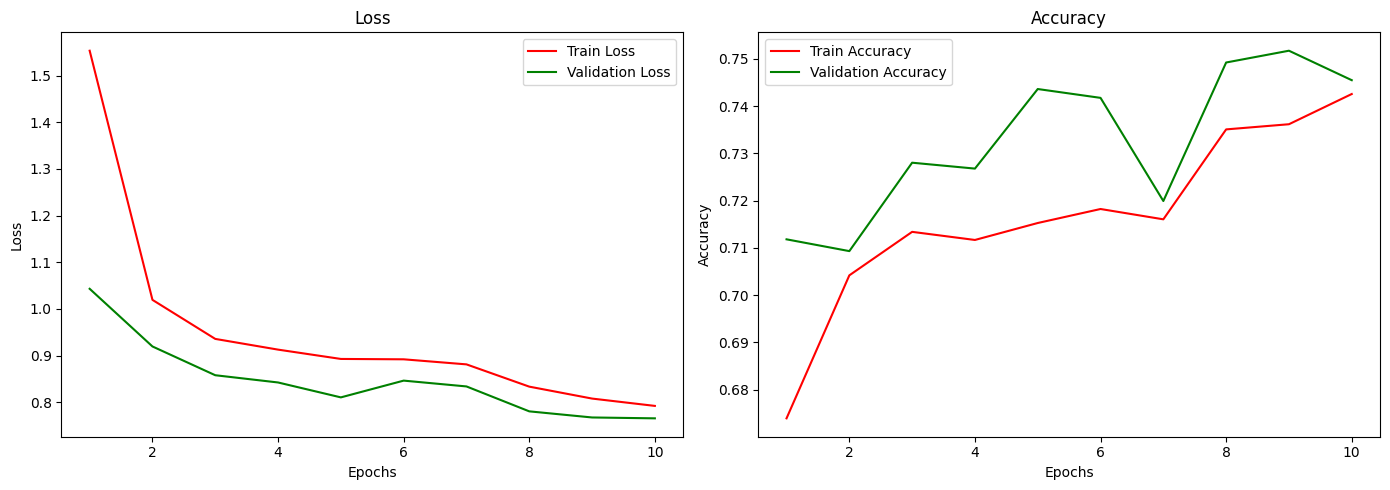

In [ ]:
# Plot training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# XceptionNet

In [ ]:
from tensorflow.keras.applications import DenseNet121,InceptionV3,Xception
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# Load ResNet50 pre-trained on ImageNet without the top layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

In [ ]:
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Calculate class weights
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 1.493661446681581, 1: 8.998203054806828, 2: 9.112829845313922, 3: 19.48443579766537, 4: 30.62691131498471, 5: 70.52816901408451, 6: 87.08695652173913}


In [ ]:
# Training the model
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 189s 886ms/step - accuracy: 0.6624 - loss: 1.0407 - val_accuracy: 0.6968 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 158s 766ms/step - accuracy: 0.7213 - loss: 0.7788 - val_accuracy: 0.7056 - val_loss: 0.7885 - learning_rate: 0.0010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 152s 733ms/step - accuracy: 0.7237 - loss: 0.7675 - val_accuracy: 0.7199 - val_loss: 0.7510 - learning_rate: 0.0010
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 201s 723ms/step - accuracy: 0.7352 - loss: 0.7195 - val_accuracy: 0.7330 - val_loss: 0.7549 - learning_rate: 0.0010
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 208s 765ms/step - accuracy: 0.7421 - loss: 0.7377 - val_accuracy: 0.7349 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 196s 727ms/step - accuracy: 0.7493 - loss: 0.7012 - val_accuracy: 0.7367 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 151s 735ms/step - accura

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 380ms/step
Accuracy: 0.74
Sensitivity: 1.00
Specificity: 0.57
Precision: 0.60
F1-Score: 0.45
AUC: 0.91


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 225ms/step


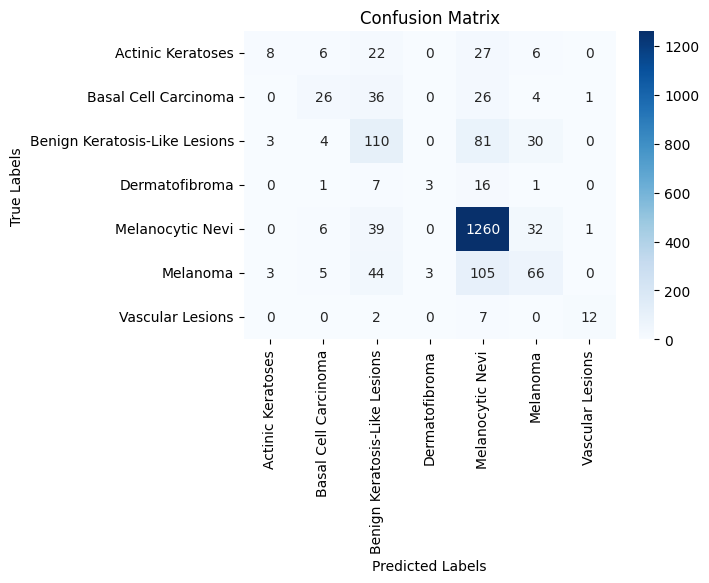

Classification Report:

                               precision    recall  f1-score   support

            Actinic Keratoses       0.57      0.12      0.19        69
         Basal Cell Carcinoma       0.54      0.28      0.37        93
Benign Keratosis-Like Lesions       0.42      0.48      0.45       228
               Dermatofibroma       0.50      0.11      0.18        28
             Melanocytic Nevi       0.83      0.94      0.88      1338
                     Melanoma       0.47      0.29      0.36       226
             Vascular Lesions       0.86      0.57      0.69        21

                     accuracy                           0.74      2003
                    macro avg       0.60      0.40      0.45      2003
                 weighted avg       0.72      0.74      0.71      2003



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step


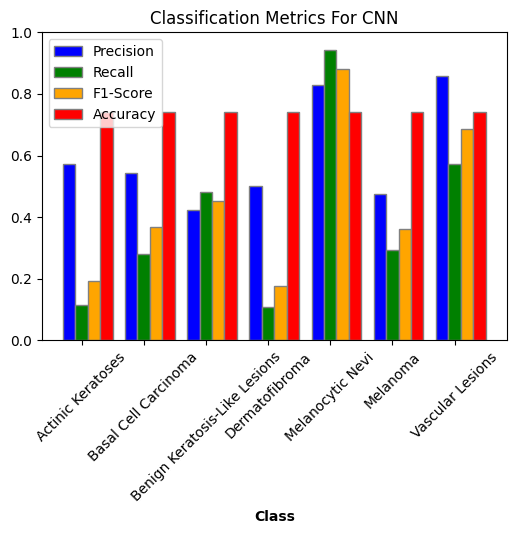

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

# The predictions will be in a one-hot encoded format, so convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Getting the true labels from the generator
true_classes = test_generator.classes
# Getting the class labels from the generator for later use in the classification report
class_labels = list(test_generator.class_indices.keys())

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

# Calculate accuracy for each class
accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

# Plotting
plt.figure(figsize=(6, 4))

# Width of each bar
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='orange', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='red', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

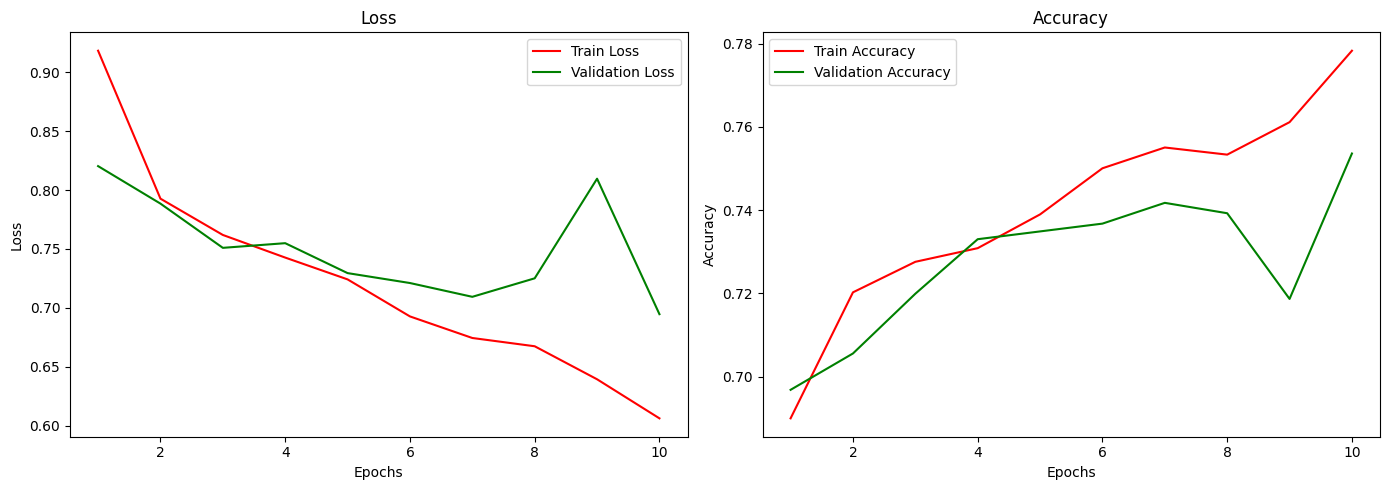

In [ ]:
# Plot training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

InceptionV3


In [ ]:
from tensorflow.keras.applications import DenseNet121,InceptionV3,  VGG19
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# Load InceptioNV3 pre-trained on ImageNet without the top layer , pooling='avg
base_model =InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras.optimizers import Adam
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
            metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Calculate class weights
class_counts = meta_data['Updated_Diagnosis_Label'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 1.493661446681581, 1: 8.998203054806828, 2: 9.112829845313922, 3: 19.48443579766537, 4: 30.62691131498471, 5: 70.52816901408451, 6: 87.08695652173913}


In [ ]:
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# Training the model
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=100,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 213s 879ms/step - accuracy: 0.6580 - loss: 1.1734 - val_accuracy: 0.7049 - val_loss: 0.8155 - learning_rate: 0.0010
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 188s 910ms/step - accuracy: 0.7073 - loss: 0.8605 - val_accuracy: 0.7255 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 169s 745ms/step - accuracy: 0.7116 - loss: 0.8188 - val_accuracy: 0.7218 - val_loss: 0.7606 - learning_rate: 0.0010
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 213s 792ms/step - accuracy: 0.7147 - loss: 0.8101 - val_accuracy: 0.7137 - val_loss: 0.7721 - learning_rate: 0.0010
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 148s 714ms/step - accuracy: 0.7137 - loss: 0.8167 - val_accuracy: 0.7286 - val_loss: 0.7501 - learning_rate: 0.0010
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 206s 735ms/step - accuracy: 0.7147 - loss: 0.7955 - val_accuracy: 0.7399 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 201s 720ms/step - accura

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"AUC: {auc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 427ms/step
Accuracy: 0.73
Sensitivity: 0.93
Specificity: 0.50
Precision: 0.45
F1-Score: 0.36
AUC: 0.89


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 235ms/step


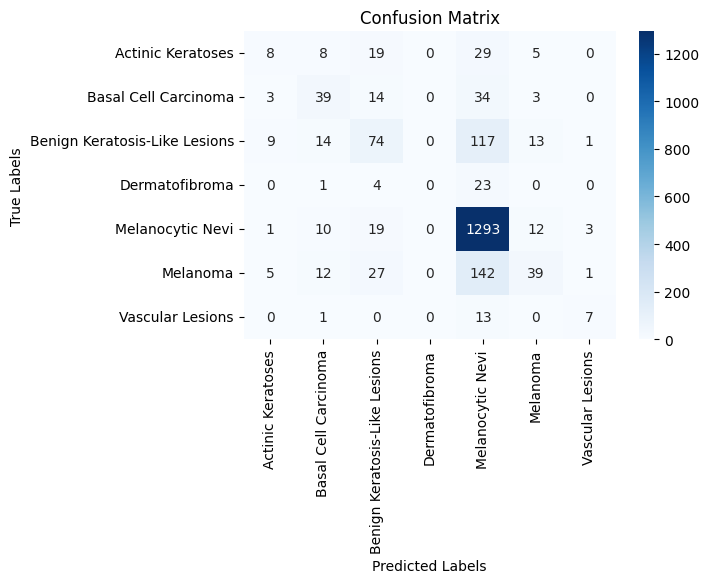

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

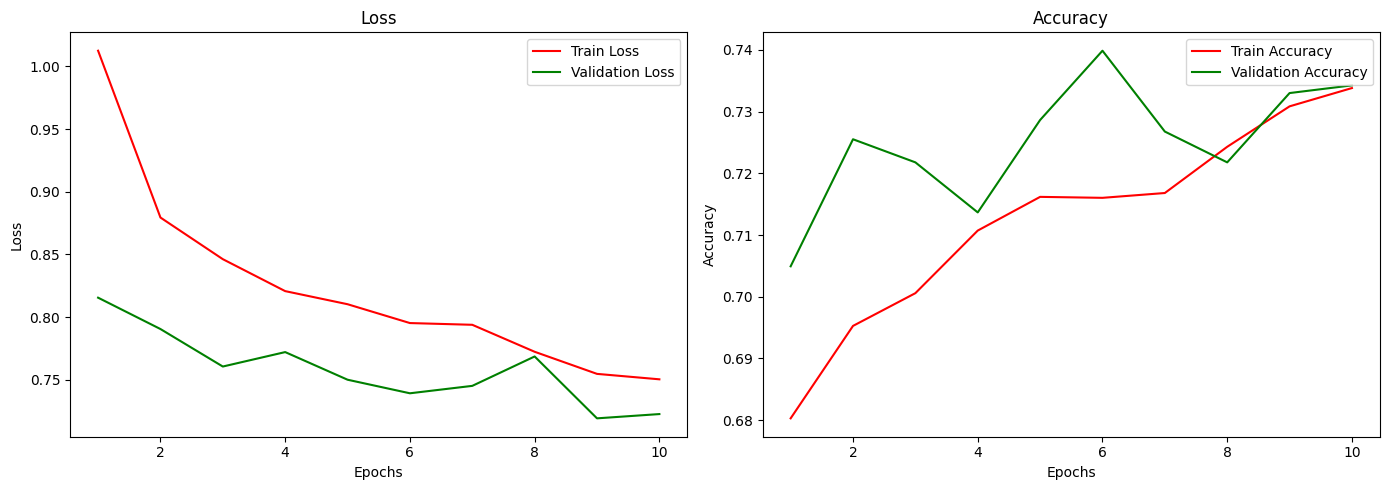

In [ ]:
# Plot training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 326ms/step


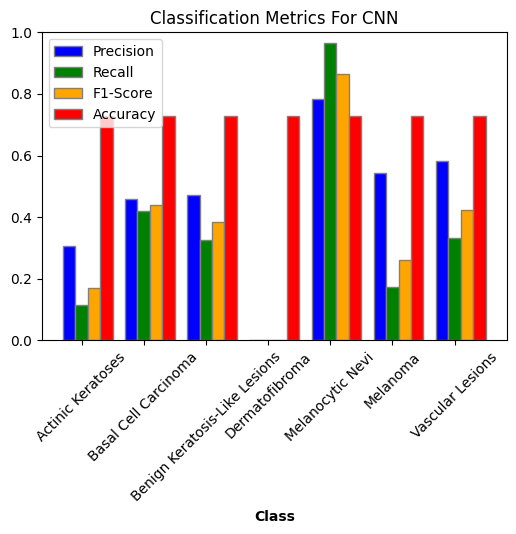

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)

# The predictions will be in a one-hot encoded format, so convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Getting the true labels from the generator
true_classes = test_generator.classes
# Getting the class labels from the generator for later use in the classification report
class_labels = list(test_generator.class_indices.keys())

# Calculate precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_classes, predicted_classes)

# Calculate accuracy for each class
accuracy = [accuracy_score(true_classes, predicted_classes) for _ in range(len(class_labels))]

# Plotting
plt.figure(figsize=(6, 4))

# Width of each bar
bar_width = 0.2
# Set the positions of the bars on the x-axis
r1 = np.arange(len(class_labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1, color='orange', width=bar_width, edgecolor='grey', label='F1-Score')
plt.bar(r4, accuracy, color='red', width=bar_width, edgecolor='grey', label='Accuracy')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(class_labels))], class_labels, rotation=45)
plt.title('Classification Metrics For CNN')
plt.legend()
plt.ylim(0, 1)
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step


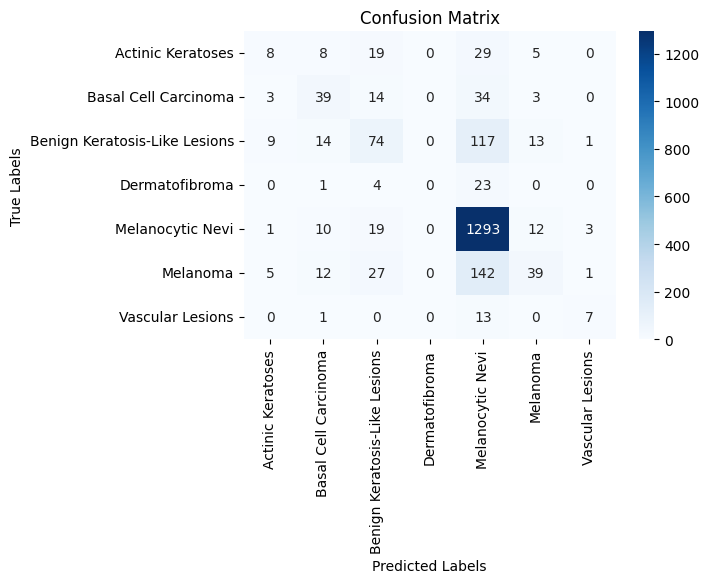

Classification Report:

                               precision    recall  f1-score   support

            Actinic Keratoses       0.31      0.12      0.17        69
         Basal Cell Carcinoma       0.46      0.42      0.44        93
Benign Keratosis-Like Lesions       0.47      0.32      0.38       228
               Dermatofibroma       0.00      0.00      0.00        28
             Melanocytic Nevi       0.78      0.97      0.87      1338
                     Melanoma       0.54      0.17      0.26       226
             Vascular Lesions       0.58      0.33      0.42        21

                     accuracy                           0.73      2003
                    macro avg       0.45      0.33      0.36      2003
                 weighted avg       0.68      0.73      0.68      2003



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Calculate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Calculate true classes
true_classes = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)
